In [1]:
df<-read.csv("case_time_series.csv")
#Reading the csv file

In [2]:
head(df)
#To view the given data

,index,Day,Daily.Count,Total.Confirmed,Daily.Recovered,Total.Recovered,Daily.Deceased,Total.Deceased,Date
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,1,0,3,0,3,0,0,1-Mar
2,1,2,2,5,0,3,0,0,2-Mar
3,2,3,1,6,0,3,0,0,3-Mar
4,3,4,22,28,0,3,0,0,4-Mar
5,4,5,2,30,0,3,0,0,5-Mar
6,5,6,1,31,0,3,0,0,6-Mar


In [5]:
df['Daily.Deceased'][df['Daily.Deceased']==2004] <- 450
#Manipulating an extreme value to give better results during regression analysis.

In [6]:
df['Daily.Active'] <- df['Total.Confirmed'] - df['Daily.Recovered'] - df['Daily.Deceased']
#Deriving Daily Active Cases by substracting 'Daily.Recovered' and 'Daily.Deceased' from 'Total.Confirmed' for each day

In [7]:
attach(df)
#so objects in the database can be accessed by simply giving their names.

In [8]:
names(df)
#names of the existing Parameters

[1] "index"           "Day"             "Daily.Count"     "Total.Confirmed"
 [5] "Daily.Recovered" "Total.Recovered" "Daily.Deceased"  "Total.Deceased" 
 [9] "Date"            "Daily.Active"

Correlation Matrix

In [9]:
my_data <- df[, c(1,3,4,5,6,7,8,10)]

In [10]:
res <- cor(my_data)
round(res, 2)

,index,Daily.Count,Total.Confirmed,Daily.Recovered,Total.Recovered,Daily.Deceased,Total.Deceased,Daily.Active
index,1.00,0.92,0.86,0.89,0.83,0.96,0.91,0.86
Daily.Count,0.92,1.00,0.96,0.98,0.95,0.97,0.99,0.96
Total.Confirmed,0.86,0.96,1.00,0.99,1.00,0.91,0.99,1.00
Daily.Recovered,0.89,0.98,0.99,1.00,0.98,0.95,0.99,0.98
Total.Recovered,0.83,0.95,1.00,0.98,1.00,0.89,0.98,1.00
Daily.Deceased,0.96,0.97,0.91,0.95,0.89,1.00,0.95,0.91
Total.Deceased,0.91,0.99,0.99,0.99,0.98,0.95,1.00,0.99
Daily.Active,0.86,0.96,1.00,0.98,1.00,0.91,0.99,1.00


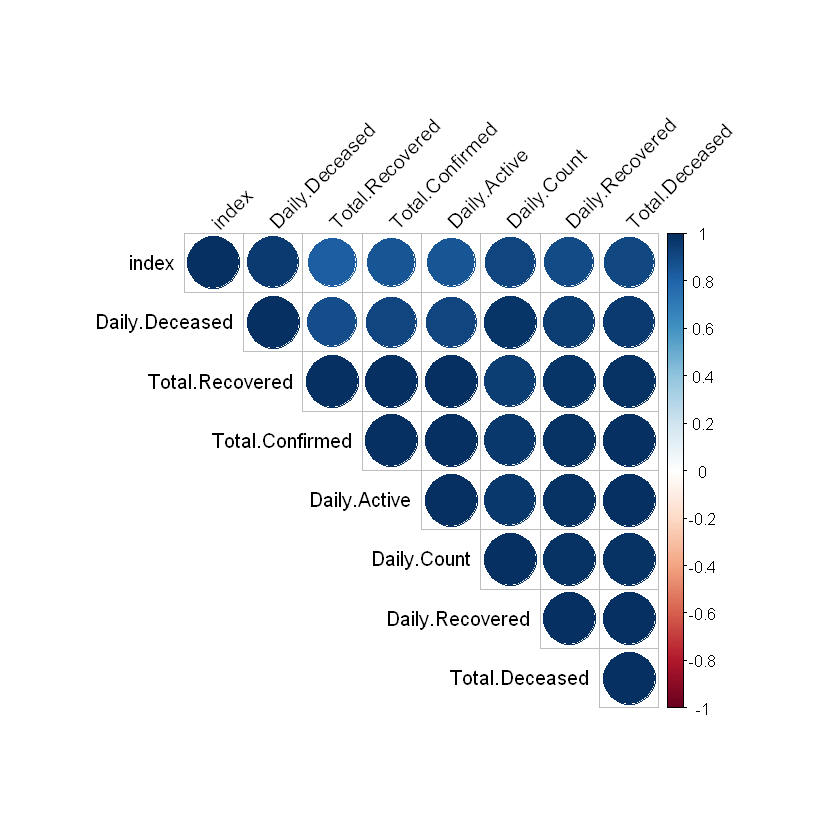

In [12]:
options(warn=-1)
library(corrplot)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

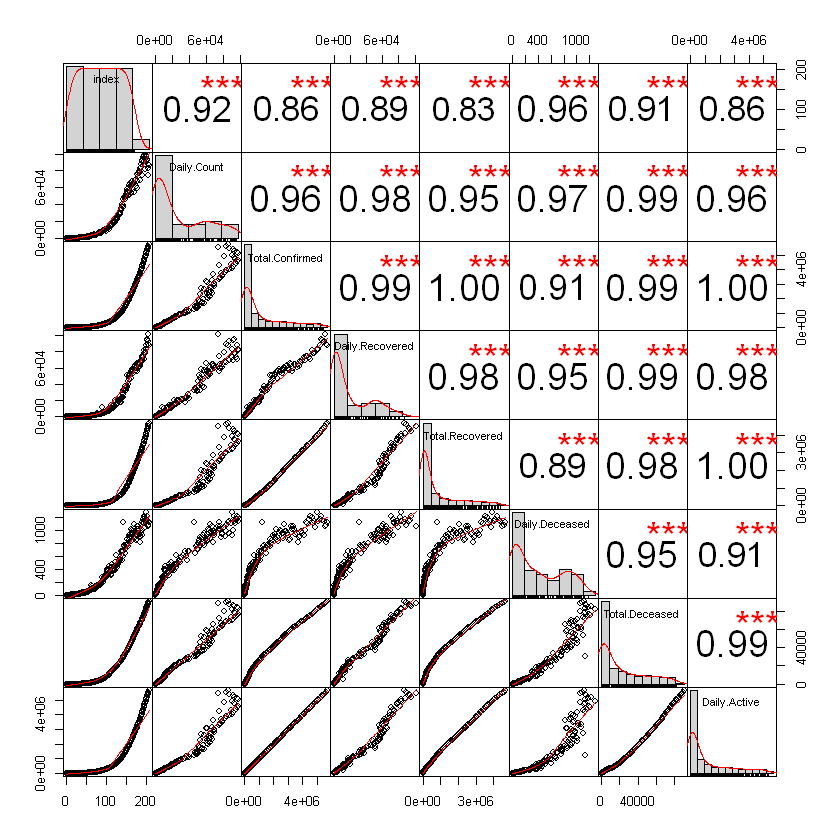

In [14]:
options(warn=-1)
library("PerformanceAnalytics")
chart.Correlation(my_data, histogram=TRUE, pch=19)

Deriving Ratios

In [15]:
index <- Day - 1

In [16]:
dd_by_dc <- Daily.Deceased/Daily.Count
dd_by_dr <- Daily.Deceased/Daily.Recovered
dd_by_da <- Daily.Deceased/Daily.Active

In [17]:
dd_by_dr[which(dd_by_dr==Inf)] <- 1
#Cleaning Extreme Values

In [18]:
dd_by_dr[which(!is.finite(dd_by_dr))] <- 0
#All non-Finite Values to 0

In [19]:
#Including the Ratios in the DataFrame
df['Daily.Deceased/Daily.Count'] <- dd_by_dc
df['Daily.Deceased/Daily.Recovered'] <- dd_by_dr
df['Daily.Deceased/Daily.Active'] <- dd_by_da

In [77]:
#Current DataFrame to work on
head(df)

,index,Day,Daily.Count,Total.Confirmed,Daily.Recovered,Total.Recovered,Daily.Deceased,Total.Deceased,Date,Daily.Active,Daily.Deceased/Daily.Count,Daily.Deceased/Daily.Recovered,Daily.Deceased/Daily.Active
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,3,0,3,0,0,1-Mar,3,NaN,0,0
2,1,2,2,5,0,3,0,0,2-Mar,5,0,0,0
3,2,3,1,6,0,3,0,0,3-Mar,6,0,0,0
4,3,4,22,28,0,3,0,0,4-Mar,28,0,0,0
5,4,5,2,30,0,3,0,0,5-Mar,30,0,0,0
6,5,6,1,31,0,3,0,0,6-Mar,31,0,0,0


In [23]:
#Summary of the current Data Frame
summary(df)

     index            Day         Daily.Count    Total.Confirmed  
 Min.   :  0.0   Min.   :  1.0   Min.   :    0   Min.   :      3  
 1st Qu.: 51.5   1st Qu.: 52.5   1st Qu.: 1472   1st Qu.:  20727  
 Median :103.0   Median :104.0   Median :11135   Median : 309599  
 Mean   :103.0   Mean   :104.0   Mean   :27682   Mean   :1155939  
 3rd Qu.:154.5   3rd Qu.:155.5   3rd Qu.:53657   3rd Qu.:1830101  
 Max.   :206.0   Max.   :207.0   Max.   :97860   Max.   :5730191  
                                                                  
 Daily.Recovered  Total.Recovered   Daily.Deceased   Total.Deceased 
 Min.   :     0   Min.   :      3   Min.   :   0.0   Min.   :    0  
 1st Qu.:   434   1st Qu.:   4173   1st Qu.:  43.0   1st Qu.:  664  
 Median :  7226   Median : 154235   Median : 312.0   Median : 8889  
 Mean   : 22569   Mean   : 841067   Mean   : 430.1   Mean   :22405  
 3rd Qu.: 44327   3rd Qu.:1208796   3rd Qu.: 825.5   3rd Qu.:38583  
 Max.   :102070   Max.   :4671837   Max.   :1281.0

In [24]:
#Updating the csv file
write.csv(df,"case_time_series_updated.csv", row.names = FALSE)

# Fitting equations on Day-wise Parameters:
1. Daily.Count
2. Daily.Recovered
3. Daily.Deceased

Linear Model

In [42]:
#linear model
linear.model_dc <-lm(Daily.Count ~ index) #Number of cases every day
linear.model_dr <-lm(Daily.Recovered ~ index) #Number of Recoveries every day 
linear.model_dd <-lm(Daily.Deceased ~ index) #Number of Fatalities every day 

In [43]:
#Metrics of linear model on each Parameter
print('Daily.Count')
summary(linear.model_dc)
print('Daily.Recovered')
summary(linear.model_dr)
print('Daily.Deceased')
summary(linear.model_dd)

[1] "Daily.Count"



Call:
lm(formula = Daily.Count ~ index)

Residuals:
   Min     1Q Median     3Q    Max 
-19098 -11384   -248   9473  26062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22019.8     1727.0  -12.75   <2e-16 ***
index          482.5       14.5   33.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12470 on 205 degrees of freedom
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.843 
F-statistic:  1107 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Recovered"



Call:
lm(formula = Daily.Recovered ~ index)

Residuals:
   Min     1Q Median     3Q    Max 
-19857 -12178    -94   9923  36898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20877.03    1776.27  -11.75   <2e-16 ***
index          421.81      14.92   28.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12820 on 205 degrees of freedom
Multiple R-squared:  0.7959,	Adjusted R-squared:  0.7949 
F-statistic: 799.6 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased"



Call:
lm(formula = Daily.Deceased ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-182.75  -99.60  -11.19   87.10  441.34 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -235.6065    15.9203  -14.80   <2e-16 ***
index          6.4634     0.1337   48.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 114.9 on 205 degrees of freedom
Multiple R-squared:  0.9194,	Adjusted R-squared:  0.919 
F-statistic:  2337 on 1 and 205 DF,  p-value: < 2.2e-16


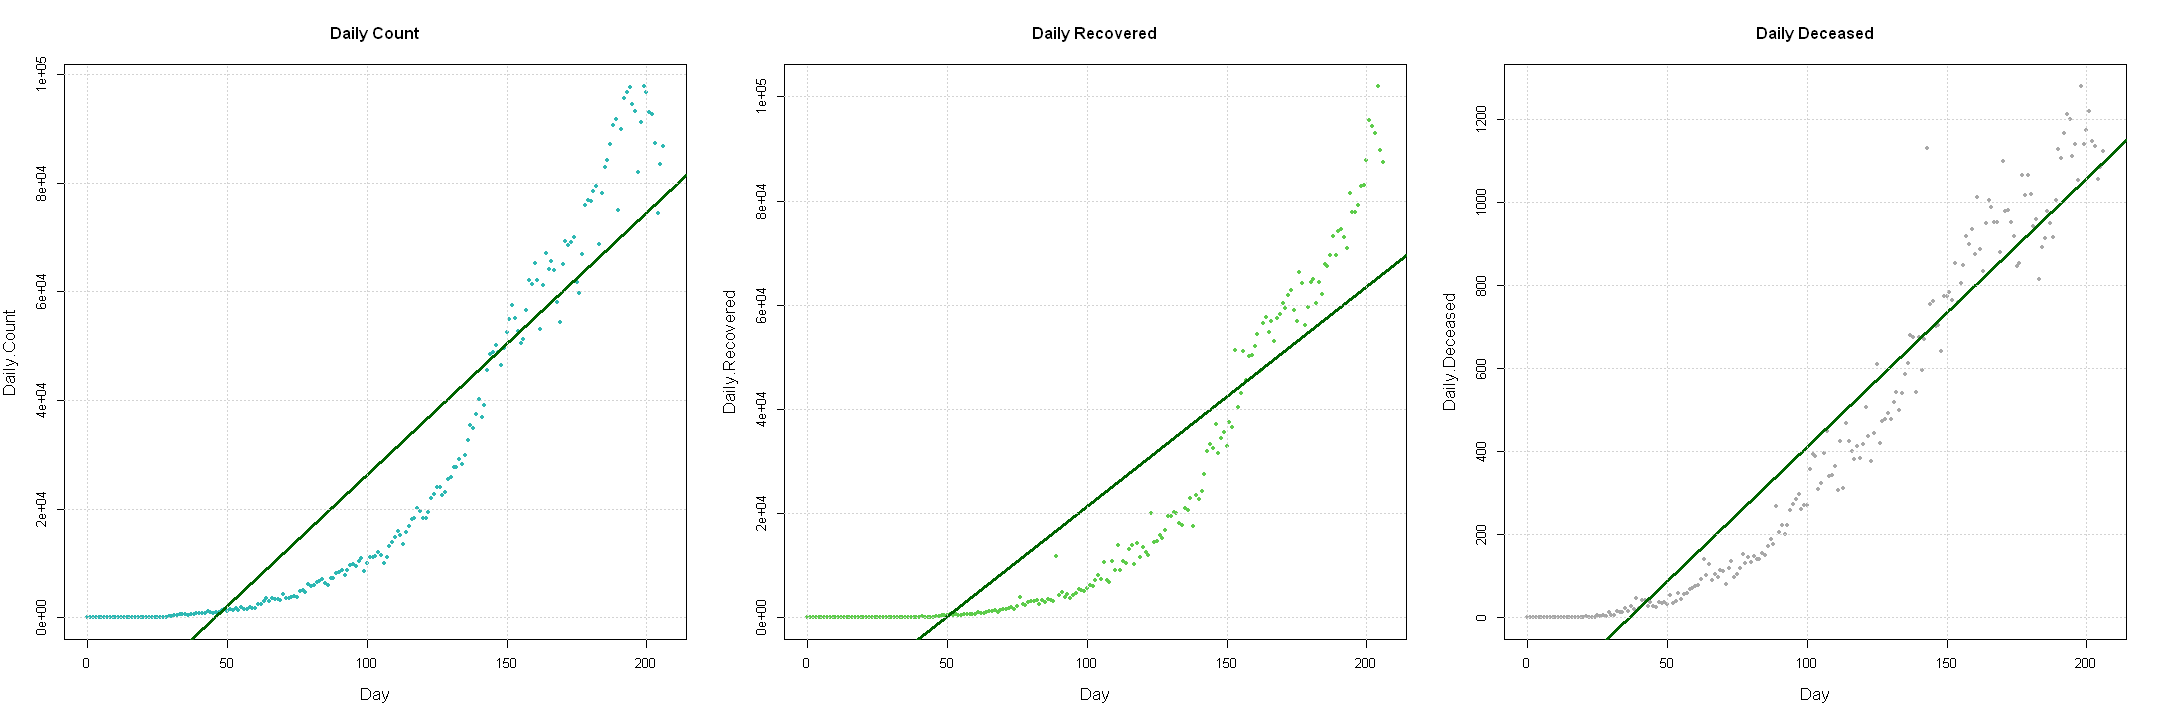

In [44]:
#Visualization of Performance of Linear Model
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
plot(index, Daily.Count, pch=20, xlab = "Day",ylab = "Daily.Count", cex.lab = 1.3, col = "#2eb8b3", main="Daily Count")

abline(lm(Daily.Count ~ index), col = "dark green", lwd = 3)
grid()

plot(index, Daily.Recovered, pch=20, xlab="Day", ylab = "Daily.Recovered", cex.lab = 1.3, col = "#5dcc4b", main="Daily Recovered")

abline(lm(Daily.Recovered ~ index), col = "dark green", lwd=3)
grid()

plot(index, Daily.Deceased, pch=20, xlab = "Day", ylab = "Daily.Deceased", cex.lab = 1.3, col = "#a8a8a8", main="Daily Deceased" )

abline(lm(Daily.Deceased ~ index), col = "dark green", lwd=3)
grid()

Quadratic Model

In [46]:
#Raised to degree 2
index2 <- index^2
quadratic.model_dc <-lm(Daily.Count ~ index + index2)
quadratic.model_dr <-lm(Daily.Recovered ~ index + index2)
quadratic.model_dd <-lm(Daily.Deceased ~ index + index2)

In [47]:
#metrics
print('Daily.Count')
summary(quadratic.model_dc)
print('Daily.Recovered')
summary(quadratic.model_dr)
print('Daily.Deceased')
summary(quadratic.model_dd)

[1] "Daily.Count"



Call:
lm(formula = Daily.Count ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-25709.2  -2795.8    407.5   2082.5  11122.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3226.9493   992.0782   3.253  0.00134 ** 
index       -256.3875    22.2505 -11.523  < 2e-16 ***
index2         3.5870     0.1046  34.309  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4804 on 204 degrees of freedom
Multiple R-squared:  0.9769,	Adjusted R-squared:  0.9767 
F-statistic:  4317 on 2 and 204 DF,  p-value: < 2.2e-16


[1] "Daily.Recovered"



Call:
lm(formula = Daily.Recovered ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10913.0  -2722.0    197.8   2669.4  11790.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5958.57848  795.11096   7.494 1.99e-12 ***
index       -363.62399   17.83292 -20.391  < 2e-16 ***
index2         3.81278    0.08379  45.502  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3850 on 204 degrees of freedom
Multiple R-squared:  0.9817,	Adjusted R-squared:  0.9815 
F-statistic:  5471 on 2 and 204 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased"



Call:
lm(formula = Daily.Deceased ~ index + index2)

Residuals:
    Min      1Q  Median      3Q     Max 
-207.09  -39.22   -5.71   37.37  494.21 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -46.787515  15.766089  -2.968  0.00336 ** 
index         0.936962   0.353605   2.650  0.00869 ** 
index2        0.026827   0.001662  16.146  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 76.34 on 204 degrees of freedom
Multiple R-squared:  0.9646,	Adjusted R-squared:  0.9643 
F-statistic:  2779 on 2 and 204 DF,  p-value: < 2.2e-16


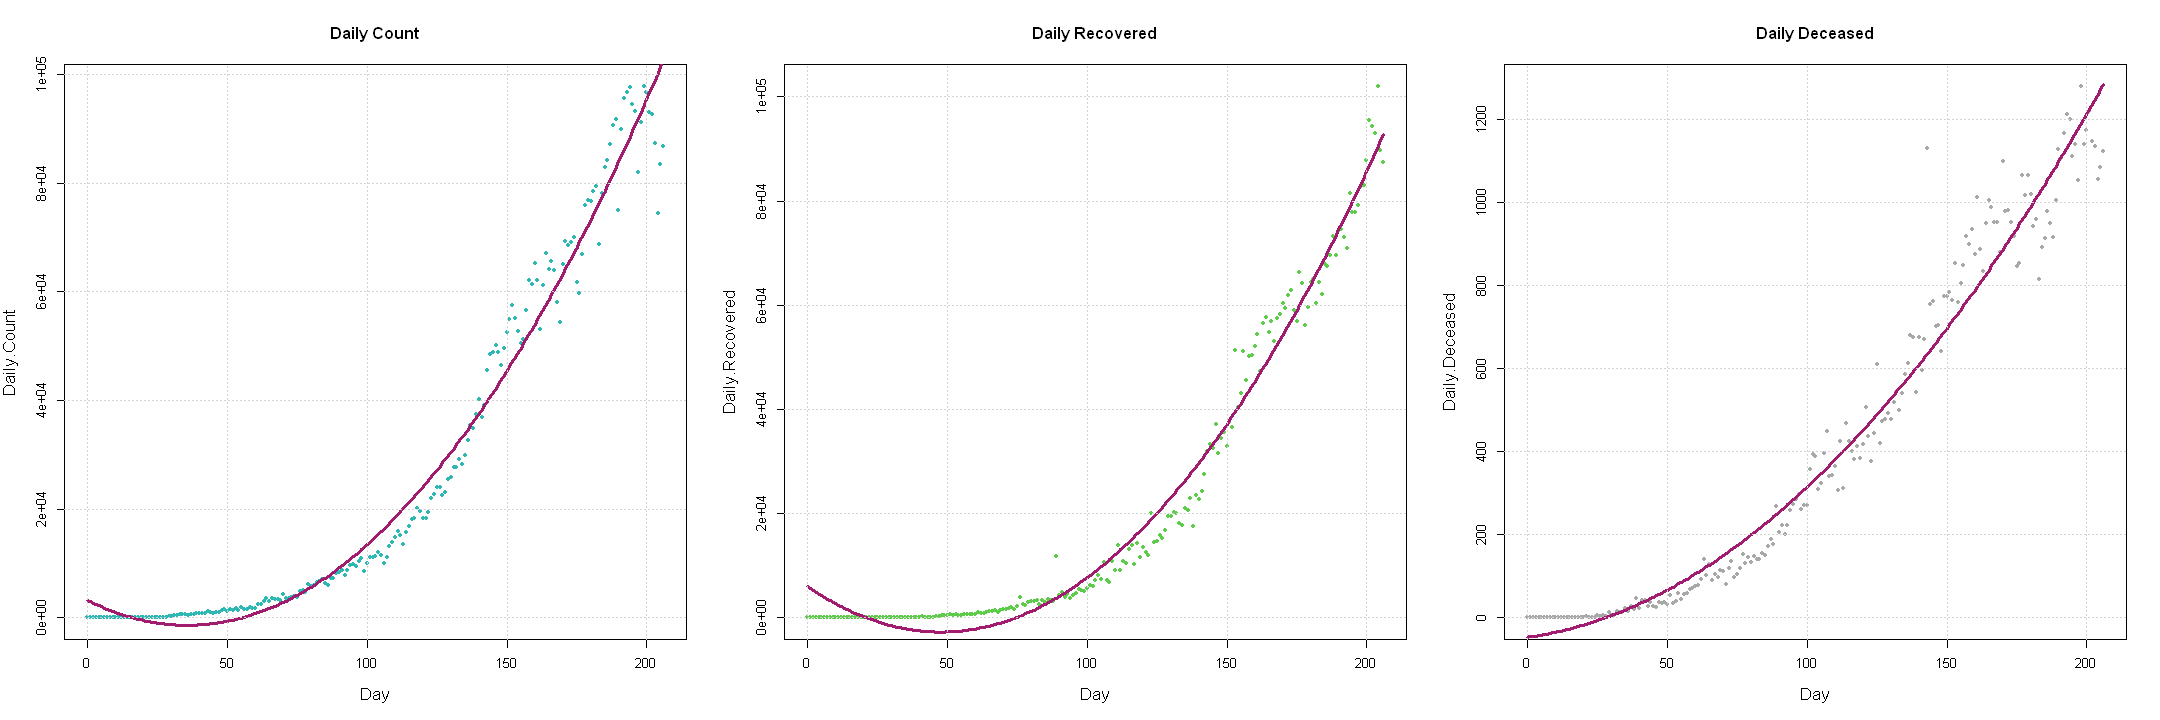

In [48]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dc,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Count, pch=20, xlab = "Day", ylab = "Daily.Count", cex.lab = 1.3, col = "#2eb8b3", main="Daily Count")
lines(timevalues, predictedcounts, col = "#a11b6e", lwd = 3)
grid()
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dr,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Recovered, pch=20, xlab = "Day", ylab = "Daily.Recovered", cex.lab = 1.3, col = "#5dcc4b", main="Daily Recovered")
lines(timevalues, predictedcounts, col = "#a11b6e", lwd = 3)
grid()
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(quadratic.model_dd,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Deceased, pch=20, xlab = "Day", ylab = "Daily.Deceased", cex.lab = 1.3, col = "#a8a8a8", main="Daily Deceased")
lines(timevalues, predictedcounts, col = "#a11b6e", lwd = 3)
grid()

Polynomial Model

In [49]:
#Polynomial
#raised to degree 3
#This is a mixed equation model
index2 <- index^2
index3 <- index^3
poly.model_dc <-lm(Daily.Count ~ index + index2 + index3)
poly.model_dr <-lm(Daily.Recovered ~ index + index2 + index3)
poly.model_dd <-lm(Daily.Deceased ~ index + index2 + index3)

In [50]:
#metrics
print('Daily.Count')
summary(poly.model_dc)
print('Daily.Recovered')
summary(poly.model_dr)
print('Daily.Deceased')
summary(poly.model_dd)

[1] "Daily.Count"



Call:
lm(formula = Daily.Count ~ index + index2 + index3)

Residuals:
   Min     1Q Median     3Q    Max 
-24455  -3290    627   2522  10527 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.644e+03  1.306e+03   3.555  0.00047 ***
index       -3.399e+02  5.504e+01  -6.176 3.53e-09 ***
index2       4.603e+00  6.218e-01   7.404 3.46e-12 ***
index3      -3.289e-03  1.984e-03  -1.658  0.09883 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4783 on 203 degrees of freedom
Multiple R-squared:  0.9772,	Adjusted R-squared:  0.9769 
F-statistic:  2904 on 3 and 203 DF,  p-value: < 2.2e-16


[1] "Daily.Recovered"



Call:
lm(formula = Daily.Recovered ~ index + index2 + index3)

Residuals:
   Min     1Q Median     3Q    Max 
 -9373  -2121    202   1280  13451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.316e+03  9.788e+02   2.366 0.018905 *  
index       -1.488e+02  4.125e+01  -3.608 0.000388 ***
index2       1.200e+00  4.659e-01   2.575 0.010731 *  
index3       8.456e-03  1.487e-03   5.688 4.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3584 on 203 degrees of freedom
Multiple R-squared:  0.9842,	Adjusted R-squared:  0.984 
F-statistic:  4219 on 3 and 203 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased"



Call:
lm(formula = Daily.Deceased ~ index + index2 + index3)

Residuals:
    Min      1Q  Median      3Q     Max 
-207.60  -34.74    3.65   27.46  449.13 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.378e+01  1.790e+01   3.005  0.00299 ** 
index       -4.993e+00  7.542e-01  -6.621 3.13e-10 ***
index2       9.897e-02  8.519e-03  11.617  < 2e-16 ***
index3      -2.335e-04  2.718e-05  -8.590 2.31e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 65.54 on 203 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.9737 
F-statistic:  2538 on 3 and 203 DF,  p-value: < 2.2e-16


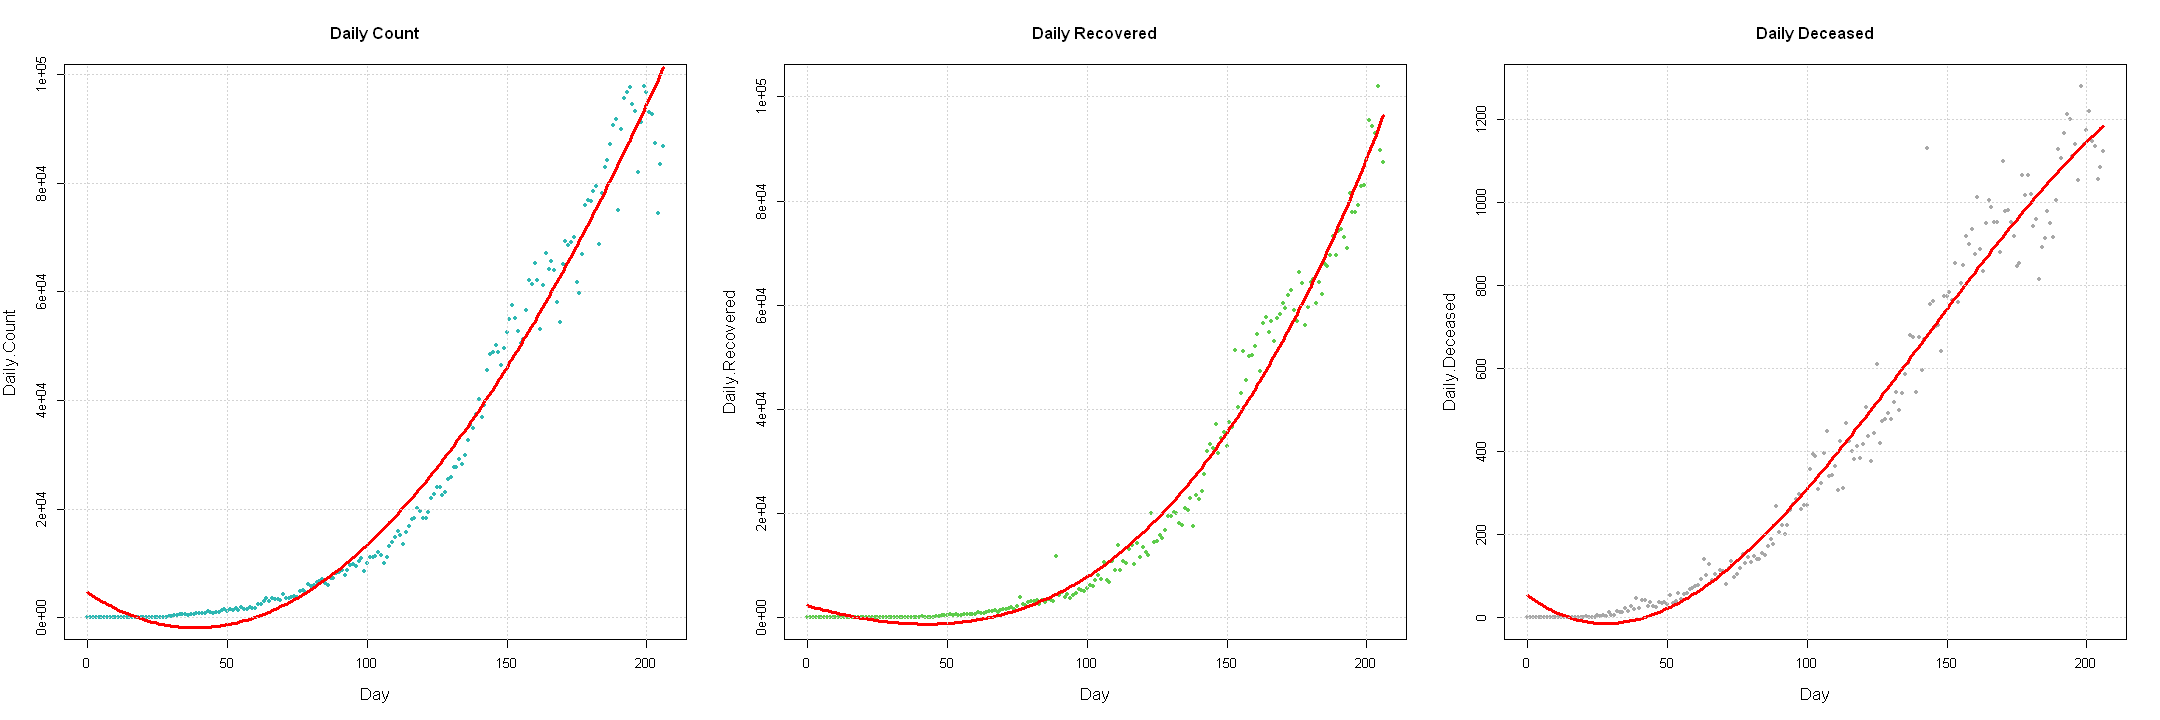

In [52]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dc,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, Daily.Count, pch=20, xlab = "Day", ylab = "Daily.Count", cex.lab = 1.3, col = "#2eb8b3", main="Daily Count")
lines(timevalues, predictedcounts, col = "red", lwd = 3)
grid()
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dr,list(index=timevalues, index2=timevalues^2))
plot(index, Daily.Recovered, pch=20, xlab = "Day", ylab = "Daily.Recovered", cex.lab = 1.3, col = "#5dcc4b", main="Daily Recovered")
lines(timevalues, predictedcounts, col = "red", lwd = 3)
grid()
timevalues <- seq(0, 206, 1)
predictedcounts <- predict(poly.model_dd,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, Daily.Deceased, pch=20, xlab = "Day", ylab = "Daily.Deceased", cex.lab = 1.3, col = "#a8a8a8", main="Daily Deceased")
lines(timevalues, predictedcounts, col = "red", lwd = 3)
grid()

Exponential Model

In [53]:
#exponential
#finding log values
logdc <- log(Daily.Count)
logdc[which(!is.finite(logdc))] <- 0 #To eliminate all the extreme values
logdr <- log(Daily.Recovered)
logdr[which(!is.finite(logdr))] <- 0
logdd <- log(Daily.Deceased)
logdd[which(!is.finite(logdd))] <- 0

In [54]:
exponential.model_dc <- lm(logdc~ index)
exponential.model_dr <- lm(logdr~ index)
exponential.model_dd <- lm(logdd~ index)

In [55]:
#reviewing the metrics
print('Daily.Count')
summary(exponential.model_dc)
print('Daily.Recovered')
summary(exponential.model_dr)
print('Daily.Deceased')
summary(exponential.model_dd)


[1] "Daily.Count"



Call:
lm(formula = logdc ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3021 -0.6702  0.4124  0.8501  1.3356 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.08462    0.15843   25.78   <2e-16 ***
index        0.04350    0.00133   32.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.144 on 205 degrees of freedom
Multiple R-squared:  0.8391,	Adjusted R-squared:  0.8383 
F-statistic:  1069 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Recovered"



Call:
lm(formula = logdr ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2448 -0.9425  0.3474  1.0958  2.4017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.094751   0.180501   11.61   <2e-16 ***
index       0.054763   0.001516   36.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.303 on 205 degrees of freedom
Multiple R-squared:  0.8643,	Adjusted R-squared:  0.8636 
F-statistic:  1305 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased"



Call:
lm(formula = logdd ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1909 -0.7199  0.3260  0.7754  1.4169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.369978   0.127723   10.73   <2e-16 ***
index       0.034203   0.001073   31.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9221 on 205 degrees of freedom
Multiple R-squared:  0.8322,	Adjusted R-squared:  0.8314 
F-statistic:  1017 on 1 and 205 DF,  p-value: < 2.2e-16


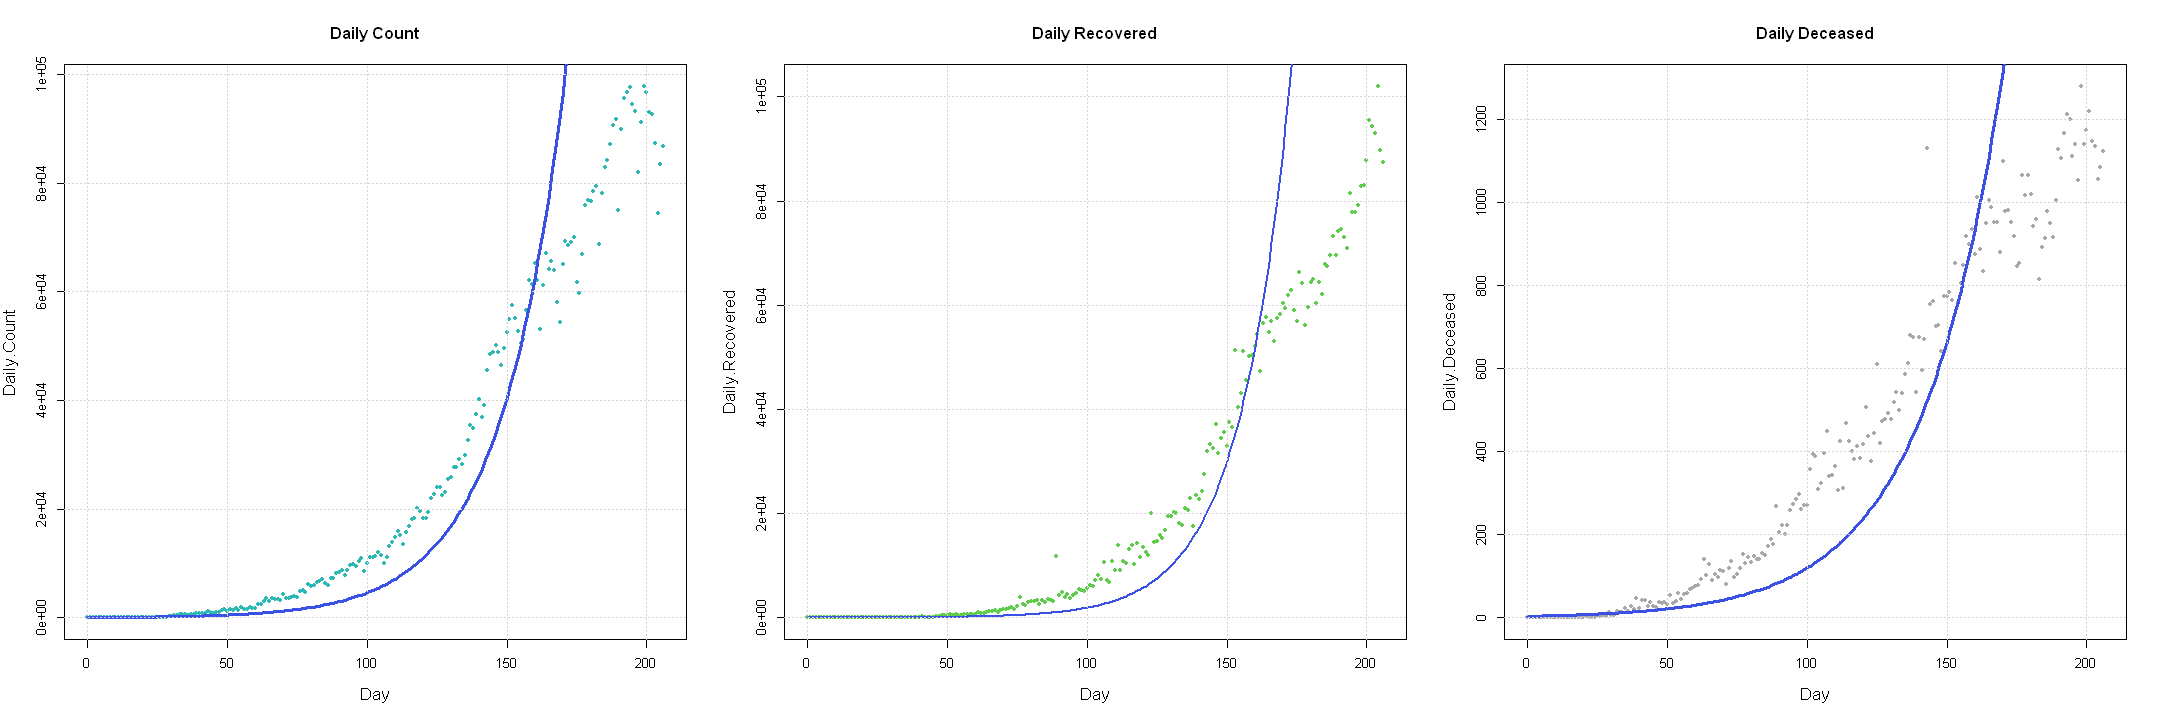

In [56]:
#visualization of the performance
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dc,list(Time=timevalues)))
plot(index, Daily.Count,pch=20, col = "#2eb8b3", xlab = "Day", ylab = "Daily.Count", cex.lab = 1.3, main="Daily Count" )
lines(timevalues, Counts.exponential2,lwd=3, col = "#3b51e3", xlab = "Time (s)", ylab = "Daily.Count")
grid()
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dr,list(Time=timevalues)))
plot(index, Daily.Recovered,pch=20, col="#5dcc4b", xlab = "Day", ylab = "Daily.Recovered", cex.lab = 1.3, main="Daily Recovered")
lines(timevalues, Counts.exponential2,lwd=2, col = "#3b51e3", xlab = "Time (s)", ylab = "Daily.Recovered")
grid()
timevalues <- seq(0, 206, 1)
Counts.exponential2 <- exp(predict(exponential.model_dd,list(Time=timevalues)))
plot(index, Daily.Deceased,pch=20, col="#a8a8a8", xlab = "Day", ylab = "Daily.Deceased", cex.lab = 1.3, main="Daily Deceased")
lines(timevalues, Counts.exponential2,lwd=3, col = "#3b51e3", xlab = "Day", ylab = "Daily.Deceased")
grid()

Polynomial Model shows the best performance on the day-wise parameters so far.

# Running Models on the following Ratios:
1. Daily.Deceased/Daily.Count
2. Daily.Deceased/Daily.Recovered
3. Daily.Deceased/Daily.Active

Visualization of the Ratios

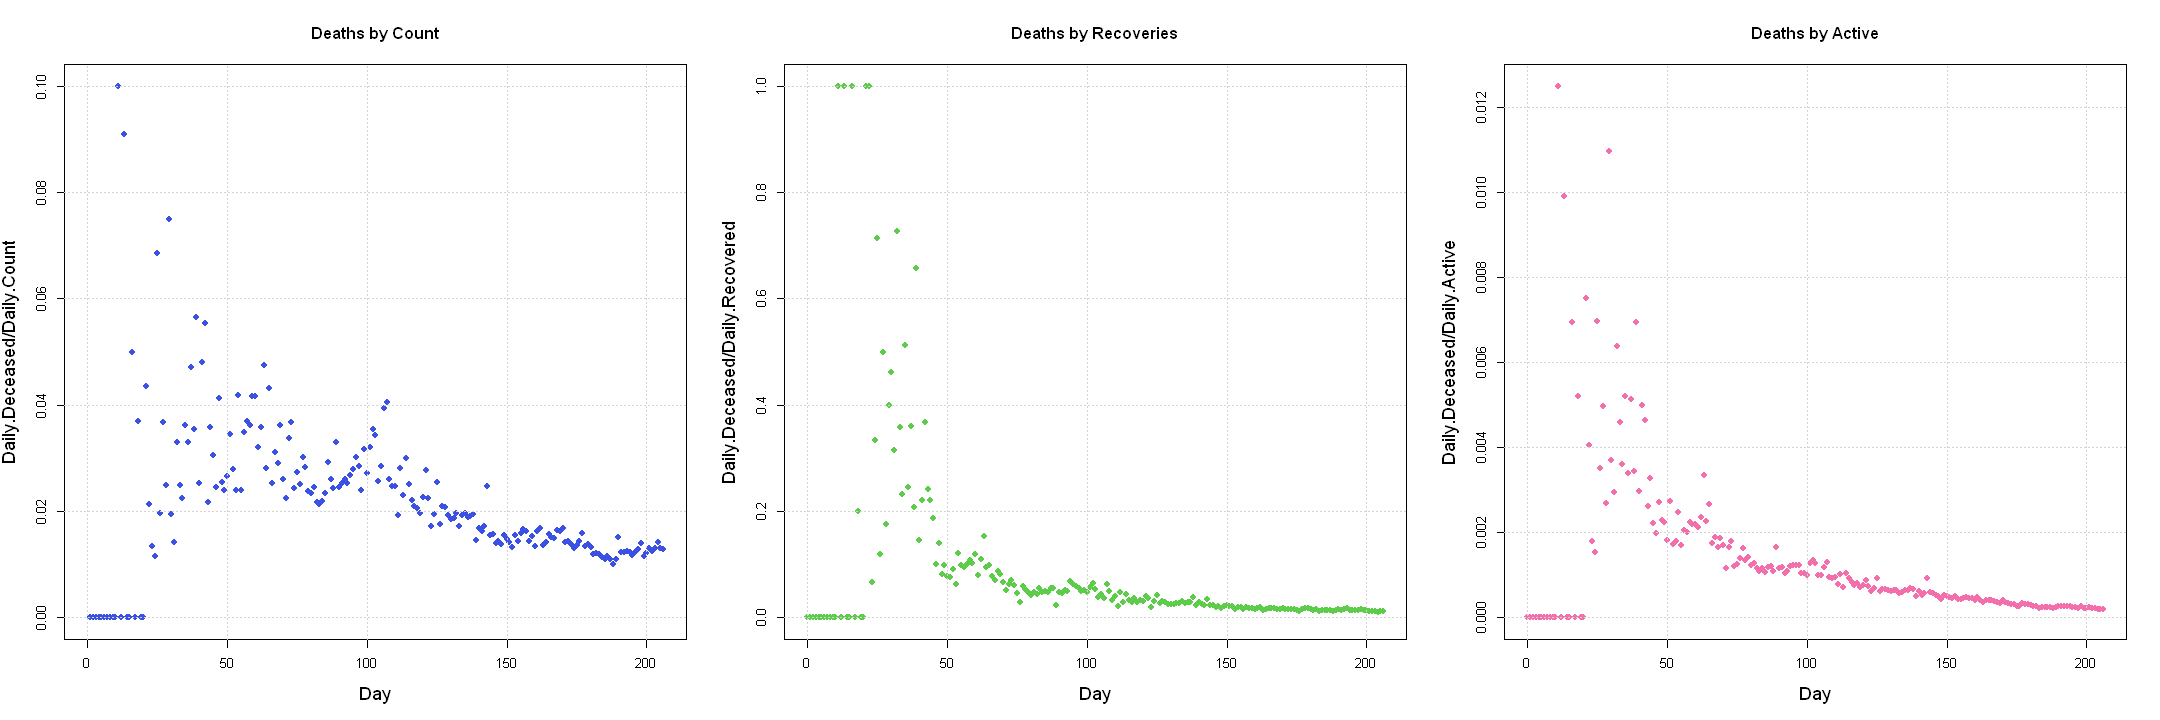

In [59]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
plot(index, dd_by_dc,pch=16, col="#3b51e3", xlab = "Day", ylab = "Daily.Deceased/Daily.Count", cex.lab = 1.4, main="Deaths by Count")
grid()
plot(index, dd_by_dr,pch=16, col="#5dcc4b", xlab = "Day", ylab = "Daily.Deceased/Daily.Recovered", cex.lab = 1.4, main="Deaths by Recoveries")
grid()
plot(index, dd_by_da,pch=16, col="#f26fac", xlab = "Day", ylab = "Daily.Deceased/Daily.Active", cex.lab = 1.4, main="Deaths by Active")
grid()

All these ratios appear to be decreasing with time.

Linear Model 

In [60]:
#Fitting into linear model
linear.model_1 <-lm(dd_by_dc ~ index)
linear.model_2 <-lm(dd_by_dr ~ index)
linear.model_3 <-lm(dd_by_da ~ index)

In [62]:
#Metrics of Linear Model
print('Daily.Deceased/Daily.Count')
summary(linear.model_1)
print('Daily.Deceased/Daily.Recovered')
summary(linear.model_2)
print('Daily.Deceased/Daily.Active')
summary(linear.model_3)

[1] "Daily.Deceased/Daily.Count"



Call:
lm(formula = dd_by_dc ~ index)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030723 -0.003138 -0.001081  0.004434  0.070091 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.080e-02  1.869e-03  16.483  < 2e-16 ***
index       -8.133e-05  1.566e-05  -5.195 4.95e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01336 on 204 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1168,	Adjusted R-squared:  0.1125 
F-statistic: 26.98 on 1 and 204 DF,  p-value: 4.954e-07


[1] "Daily.Deceased/Daily.Recovered"



Call:
lm(formula = dd_by_dr ~ index)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23737 -0.06095 -0.02630  0.02487  0.79328 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2373672  0.0228085  10.407  < 2e-16 ***
index       -0.0013931  0.0001915  -7.273  7.3e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1647 on 205 degrees of freedom
Multiple R-squared:  0.2051,	Adjusted R-squared:  0.2012 
F-statistic:  52.9 on 1 and 205 DF,  p-value: 7.297e-12


[1] "Daily.Deceased/Daily.Active"



Call:
lm(formula = dd_by_da ~ index)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0030815 -0.0003889 -0.0001458  0.0001860  0.0095967 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.082e-03  2.207e-04  13.959  < 2e-16 ***
index       -1.620e-05  1.854e-06  -8.737 8.57e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001594 on 205 degrees of freedom
Multiple R-squared:  0.2713,	Adjusted R-squared:  0.2678 
F-statistic: 76.33 on 1 and 205 DF,  p-value: 8.57e-16


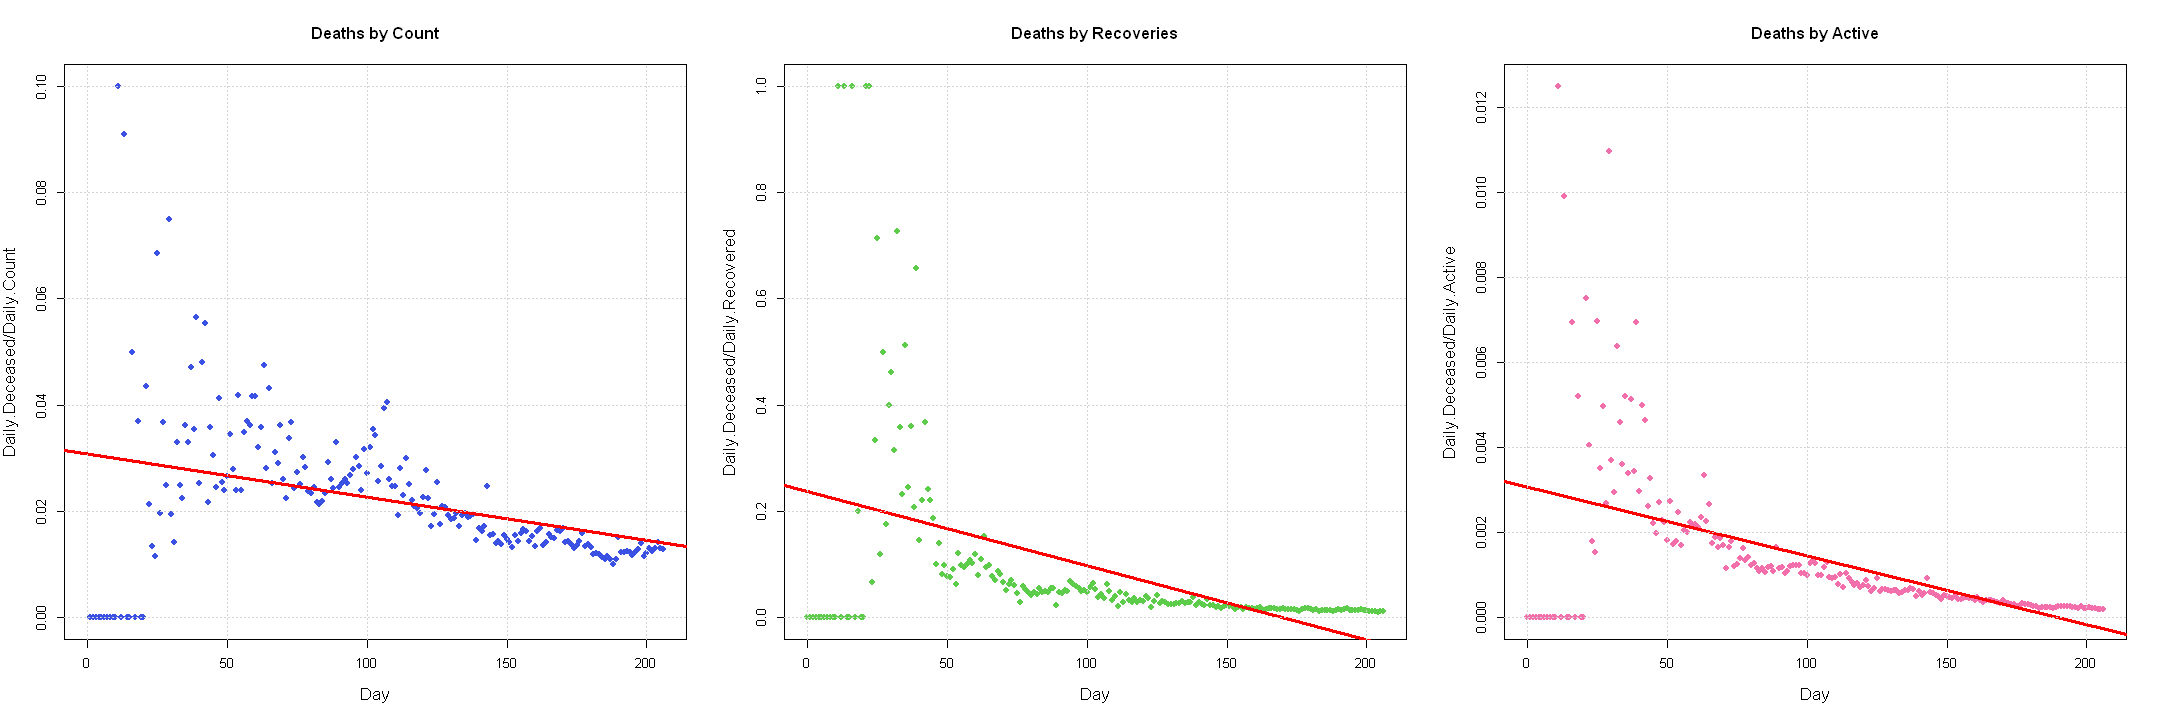

In [66]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
plot(index, dd_by_dc,pch=16, col="#3b51e3", xlab = "Day", ylab = "Daily.Deceased/Daily.Count", cex.lab = 1.3, main="Deaths by Count")
abline(lm(dd_by_dc ~ index), col = "red", lwd=3)
grid()
plot(index, dd_by_dr,pch=16, col="#5dcc4b", xlab = "Day", ylab = "Daily.Deceased/Daily.Recovered", cex.lab = 1.3, main="Deaths by Recoveries")
abline(lm(dd_by_dr ~ index), col = "red", lwd=3)
grid()
plot(index, dd_by_da,pch=16, col="#f26fac", xlab = "Day", ylab = "Daily.Deceased/Daily.Active", cex.lab = 1.3, main="Deaths by Active")
abline(lm(dd_by_da ~ index), col = "red", lwd=3)
grid()

Quadratic Model

In [64]:
#raised to degree 2
index2 <- index^2
quadratic.model_1 <-lm(dd_by_dc ~ index + index2)
quadratic.model_2 <-lm(dd_by_dr ~ index + index2)
quadratic.model_3 <-lm(dd_by_da ~ index + index2)

In [65]:
#Metrics
print('Daily.Deceased/Daily.Count')
summary(quadratic.model_1)
print('Daily.Deceased/Daily.Recovered')
summary(quadratic.model_2)
print('Daily.Deceased/Daily.Active')
summary(quadratic.model_3)

[1] "Daily.Deceased/Daily.Count"



Call:
lm(formula = dd_by_dc ~ index + index2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.024457 -0.004933 -0.001355  0.003670  0.076987 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.095e-02  2.672e-03   7.839 2.52e-13 ***
index        2.030e-04  5.961e-05   3.406 0.000794 ***
index2      -1.374e-06  2.789e-07  -4.926 1.74e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01266 on 203 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2111,	Adjusted R-squared:  0.2033 
F-statistic: 27.16 on 2 and 203 DF,  p-value: 3.526e-11


[1] "Daily.Deceased/Daily.Recovered"



Call:
lm(formula = dd_by_dr ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30060 -0.03887 -0.00227  0.00653  0.76642 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.006e-01  3.356e-02   8.956  < 2e-16 ***
index       -3.244e-03  7.528e-04  -4.309 2.55e-05 ***
index2       8.984e-06  3.537e-06   2.540   0.0118 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1625 on 204 degrees of freedom
Multiple R-squared:  0.2295,	Adjusted R-squared:  0.2219 
F-statistic: 30.38 on 2 and 204 DF,  p-value: 2.833e-12


[1] "Daily.Deceased/Daily.Active"



Call:
lm(formula = dd_by_da ~ index + index2)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0031819 -0.0003502 -0.0001202  0.0001381  0.0095269 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.182e-03  3.298e-04   9.648   <2e-16 ***
index       -1.913e-05  7.397e-06  -2.587   0.0104 *  
index2       1.426e-08  3.476e-08   0.410   0.6819    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001597 on 204 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2648 
F-statistic:  38.1 on 2 and 204 DF,  p-value: 8.747e-15


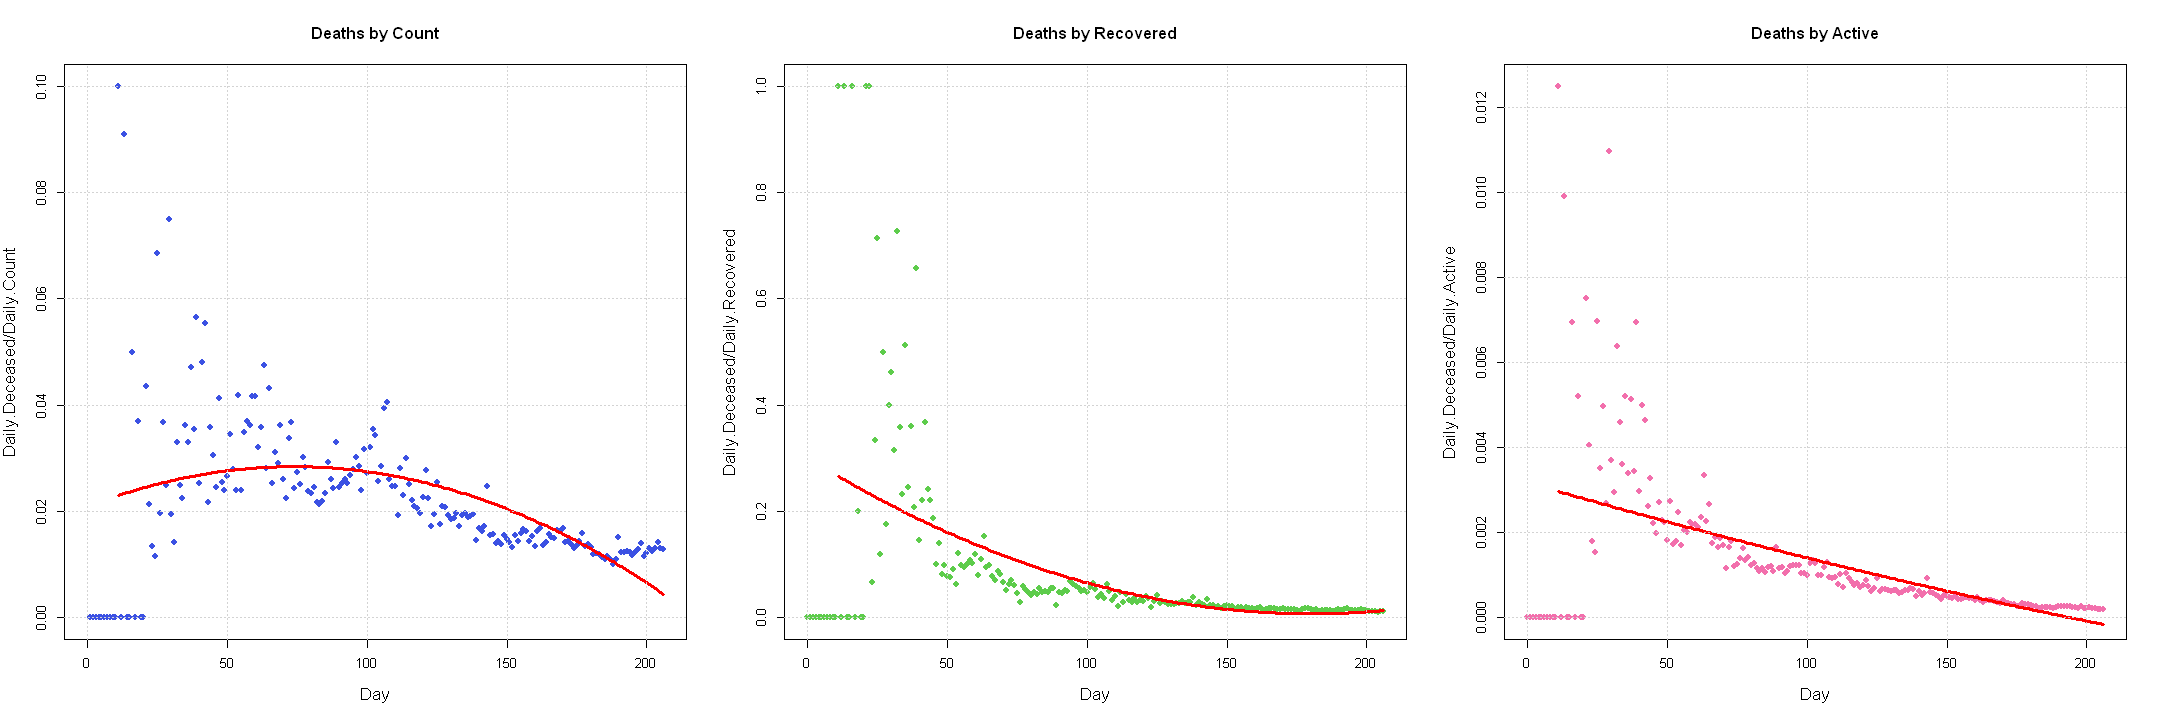

In [67]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(11, 206, 1)
predictedcounts1 <- predict(quadratic.model_1,list(index=timevalues, index2=timevalues^2))
plot(index, dd_by_dc,pch=16, col="#3b51e3", xlab = "Day", ylab = "Daily.Deceased/Daily.Count", cex.lab = 1.3, main="Deaths by Count")
lines(timevalues, predictedcounts1, col = "red", lwd = 3)
grid()
predictedcounts2 <- predict(quadratic.model_2,list(index=timevalues, index2=timevalues^2))
plot(index, dd_by_dr,pch=16, col="#5dcc4b", xlab = "Day", ylab = "Daily.Deceased/Daily.Recovered", cex.lab = 1.3, main="Deaths by Recovered")
lines(timevalues, predictedcounts2, col = "red", lwd = 3)
grid()
predictedcounts3 <- predict(quadratic.model_3,list(index=timevalues, index2=timevalues^2))
plot(index, dd_by_da,pch=16, col="#f26fac", xlab = "Day", ylab = "Daily.Deceased/Daily.Active", cex.lab = 1.3, main="Deaths by Active")
lines(timevalues, predictedcounts3, col = "red", lwd = 3)
grid()

Polynomial Model

In [68]:
#raised to degree 3
index2 <- index^2
index3 <- index^3
poly.model_1 <-lm(dd_by_dc ~ index + index2 + index3)
poly.model_2 <-lm(dd_by_dr ~ index + index2 + index3)
poly.model_3 <-lm(dd_by_da ~ index + index2 + index3)

In [69]:
#Metrics
print('Daily.Deceased/Daily.Count')
summary(poly.model_1)
print('Daily.Deceased/Daily.Recovered')
summary(poly.model_2)
print('Daily.Deceased/Daily.Active')
summary(poly.model_3)

[1] "Daily.Deceased/Daily.Count"



Call:
lm(formula = dd_by_dc ~ index + index2 + index3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023047 -0.004621 -0.000804  0.002381  0.082625 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.430e-03  3.353e-03   2.514   0.0127 *  
index        9.200e-04  1.399e-04   6.574 4.10e-10 ***
index2      -1.001e-05  1.569e-06  -6.381 1.18e-09 ***
index3       2.782e-08  4.983e-09   5.583 7.56e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01181 on 202 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3166,	Adjusted R-squared:  0.3064 
F-statistic: 31.19 on 3 and 202 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased/Daily.Recovered"



Call:
lm(formula = dd_by_dr ~ index + index2 + index3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24539 -0.05819 -0.00610  0.02536  0.76781 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.454e-01  4.409e-02   5.565 8.21e-08 ***
index        1.148e-05  1.858e-03   0.006   0.9951    
index2      -3.062e-05  2.099e-05  -1.459   0.1462    
index3       1.282e-07  6.697e-08   1.914   0.0571 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1615 on 203 degrees of freedom
Multiple R-squared:  0.2431,	Adjusted R-squared:  0.2319 
F-statistic: 21.74 on 3 and 203 DF,  p-value: 3.002e-12


[1] "Daily.Deceased/Daily.Active"



Call:
lm(formula = dd_by_da ~ index + index2 + index3)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0027066 -0.0005913 -0.0000774  0.0003256  0.0100075 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.077e-03  4.208e-04   4.937 1.66e-06 ***
index        4.601e-05  1.773e-05   2.595 0.010161 *  
index2      -7.782e-07  2.003e-07  -3.885 0.000138 ***
index3       2.565e-09  6.391e-10   4.013 8.43e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001541 on 203 degrees of freedom
Multiple R-squared:  0.3254,	Adjusted R-squared:  0.3155 
F-statistic: 32.65 on 3 and 203 DF,  p-value: < 2.2e-16


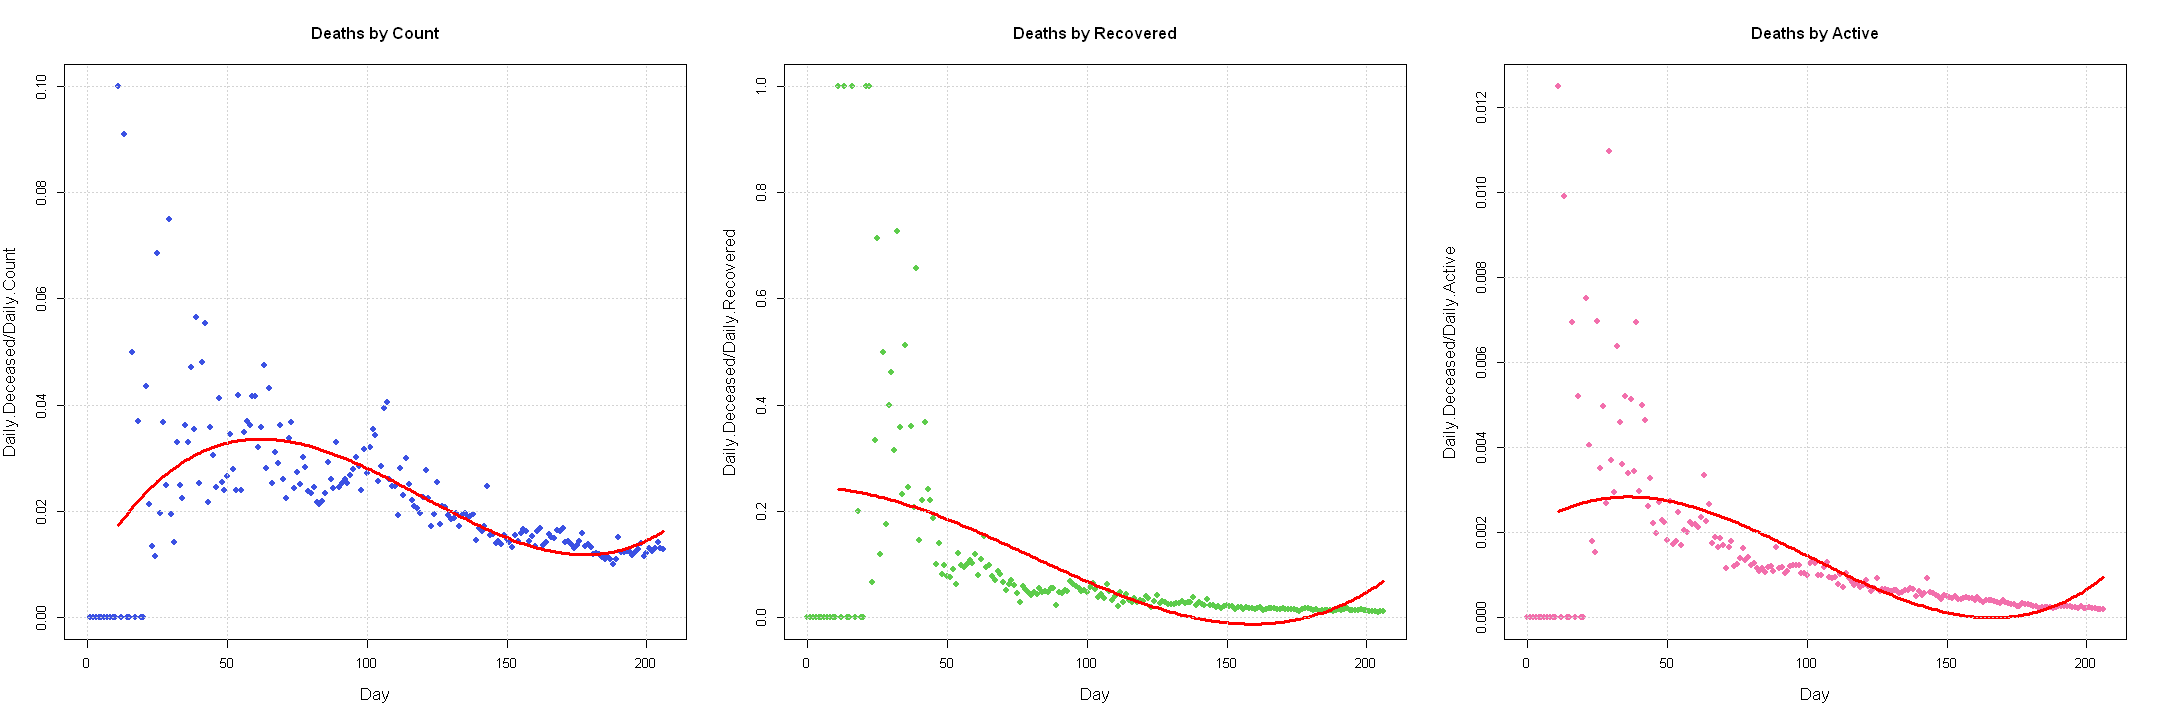

In [72]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(11, 206, 1)
predictedcounts1 <- predict(poly.model_1,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, dd_by_dc,pch=16, col="#3b51e3", xlab = "Day", ylab = "Daily.Deceased/Daily.Count", cex.lab = 1.3, main="Deaths by Count")
lines(timevalues, predictedcounts1, col = "red", lwd = 3)
grid()
predictedcounts2 <- predict(poly.model_2,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, dd_by_dr,pch=16, col="#5dcc4b", xlab = "Day", ylab = "Daily.Deceased/Daily.Recovered", cex.lab = 1.3, main="Deaths by Recovered")
lines(timevalues, predictedcounts2, col = "red", lwd = 3)
grid()
predictedcounts3 <- predict(poly.model_3,list(index=timevalues, index2=timevalues^2, index3=timevalues^3))
plot(index, dd_by_da,pch=16, col="#f26fac", xlab = "Day", ylab = "Daily.Deceased/Daily.Active", cex.lab = 1.3, main="Deaths by Active")
lines(timevalues, predictedcounts3, col = "red", lwd = 3)
grid()

Exponential Model

In [73]:
#Finding Log values
log1 <- log(dd_by_dc)
log1[which(!is.finite(log1))] <- 0 #To remove extreme values
log2 <- log(dd_by_dr)
log2[which(!is.finite(log2))] <- 0
log3 <- log(dd_by_da)
log3[which(!is.finite(log3))] <- 0

In [74]:
#Fitting Models
exponential.model_1 <- lm(log1~ index)
exponential.model_2 <- lm(log2~ index)
exponential.model_3 <- lm(log3~ index)

In [75]:
#Metrics
print('Daily.Deceased/Daily.Count')
summary(exponential.model_1)
print('Daily.Deceased/Daily.Recovered')
summary(exponential.model_2)
print('Daily.Deceased/Daily.Active')
summary(exponential.model_3)

[1] "Daily.Deceased/Daily.Count"



Call:
lm(formula = log1 ~ index)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99613 -0.39226 -0.08408  0.16478  2.40484 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.137980   0.112173  -19.06   <2e-16 ***
index       -0.013343   0.000942  -14.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8099 on 205 degrees of freedom
Multiple R-squared:  0.4946,	Adjusted R-squared:  0.4921 
F-statistic: 200.6 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased/Daily.Recovered"



Call:
lm(formula = log2 ~ index)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55285 -0.35642 -0.04531  0.33920  1.13429 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6741563  0.0717254  -9.399   <2e-16 ***
index       -0.0209152  0.0006023 -34.723   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5178 on 205 degrees of freedom
Multiple R-squared:  0.8547,	Adjusted R-squared:  0.854 
F-statistic:  1206 on 1 and 205 DF,  p-value: < 2.2e-16


[1] "Daily.Deceased/Daily.Active"



Call:
lm(formula = log3 ~ index)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3173 -0.8395 -0.2332  0.3663  4.0510 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.484250   0.179275  -19.43   <2e-16 ***
index       -0.028335   0.001506  -18.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.294 on 205 degrees of freedom
Multiple R-squared:  0.6334,	Adjusted R-squared:  0.6316 
F-statistic: 354.2 on 1 and 205 DF,  p-value: < 2.2e-16


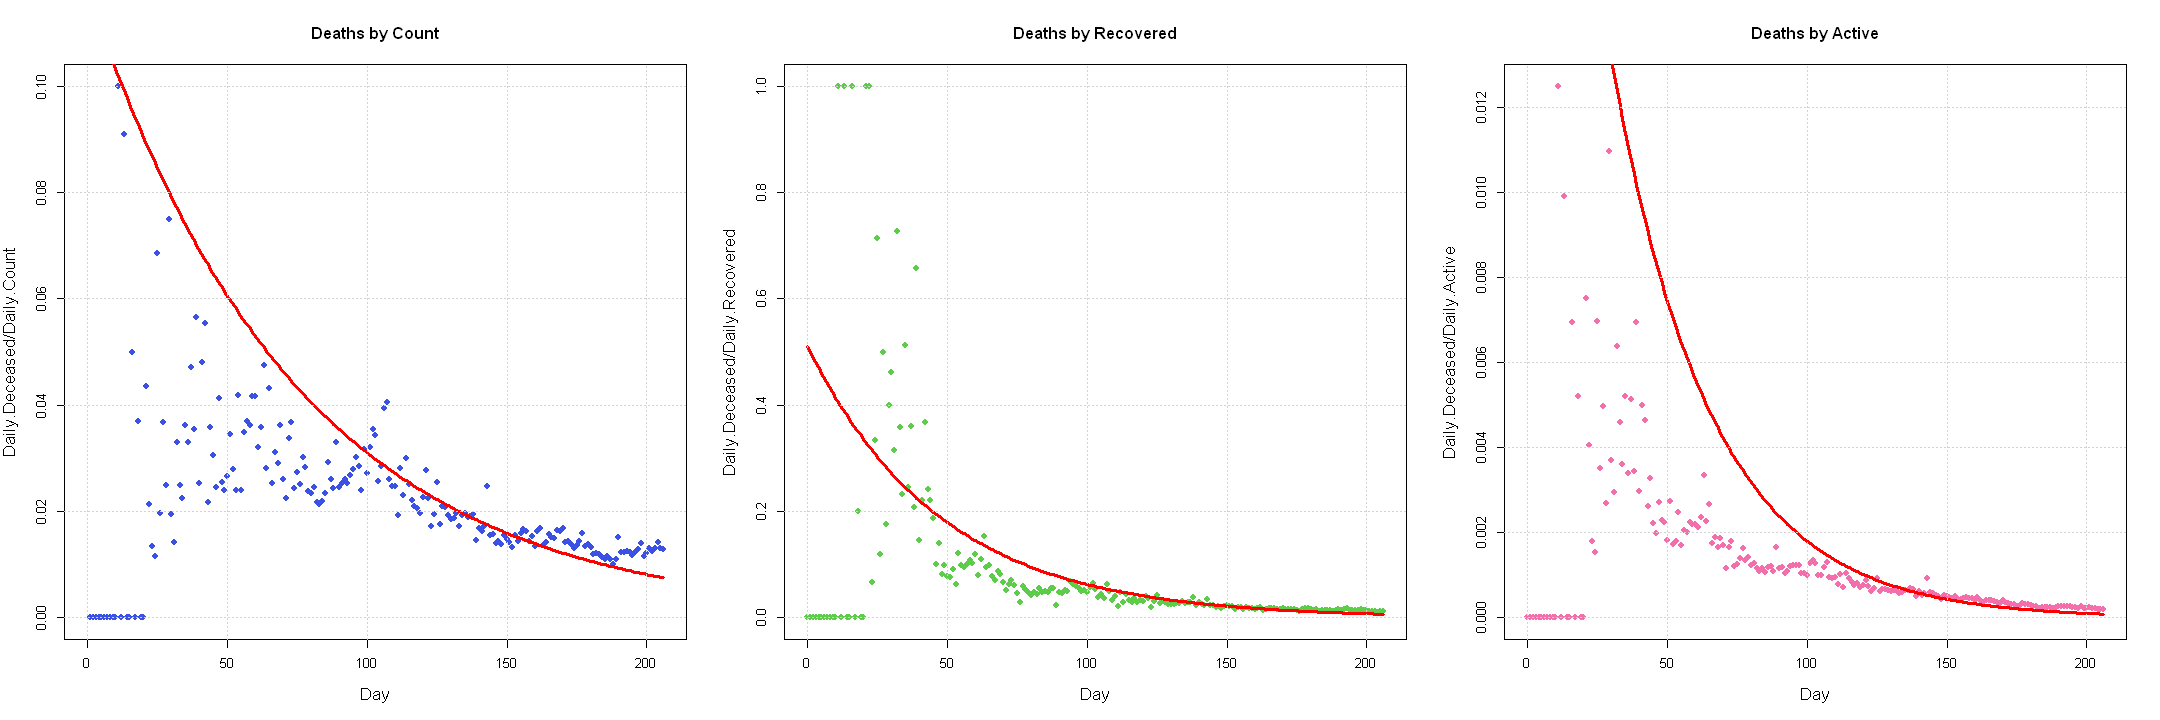

In [76]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfcol=c(1,3))
timevalues <- seq(0, 206, 1)
Counts.exponential1 <- exp(predict(exponential.model_1,list(Time=timevalues)))
plot(index, dd_by_dc,pch=16, col="#3b51e3", xlab = "Day", ylab = "Daily.Deceased/Daily.Count", cex.lab = 1.3, main="Deaths by Count")
lines(timevalues, Counts.exponential1, col = "red", lwd = 3)
grid()
Counts.exponential2 <- exp(predict(exponential.model_2,list(Time=timevalues)))
plot(index, dd_by_dr,pch=16, col="#5dcc4b", xlab = "Day", ylab = "Daily.Deceased/Daily.Recovered", cex.lab = 1.3, main="Deaths by Recovered")
lines(timevalues, Counts.exponential2, col = "red", lwd = 3)
grid()
Counts.exponential3 <- exp(predict(exponential.model_3,list(Time=timevalues)))
plot(index, dd_by_da,pch=16, col="#f26fac", xlab = "Day", ylab = "Daily.Deceased/Daily.Active", cex.lab = 1.3, main="Deaths by Active")
lines(timevalues, Counts.exponential3, col = "red", lwd = 3)
grid()

Exponential Model shows the best performance on the ratios so far